<strong><b><font size="5">Fonte: Data Science Academy</font></b></strong>

<strong><b><font size="5">Análise Estatística e Modelagem Preditiva de Séries Temporais - Em Python</font></b></strong>

<strong><b><font size="5">Forecasting - Previsões Para Séries Temporais - Modelo Base</font></b></strong>

<strong><b><font size="5">Modelo de Previsão de Capacidade</font></b></strong>

Todas as aulas deste curso podem ser encontradas na timeline da Comunidade da DSA: www.datascienceacademy.com.br

A partir desta aula entraremos no incrível universo das previsões de séries temporais, uma habilidade valiosa e importante em praticamente qualquer área de negócio.

Serão diversas aulas e iremos estudar diferentes técnicas e modelos. Let's begin.

**Por que Forecasting é Importante?**

A previsão de séries temporais (chamado Forecasting) é uma área importante do aprendizado de máquina que geralmente é negligenciada.

É importante porque existem muitos problemas de previsão que envolvem um componente de tempo. Esses problemas são negligenciados porque é esse componente do tempo que dificulta o manuseio dos dados de séries temporais.

**O Tempo**

O tempo desempenha um papel básico, e muitas vezes irrelevante, nos conjuntos de dados que usamos em Machine Learning de forma tradicional (qualquer coisa que não seja série temporal).

São feitas previsões para novos dados quando o resultado real pode não ser conhecido até alguma data futura. O futuro está sendo previsto, mas todas as observações anteriores são quase sempre tratadas igualmente. Talvez com algumas dinâmicas temporais muito pequenas para superar a ideia de “desvio de conceito”, como usar apenas o último ano de observações em vez de todos os dados disponíveis.

Um conjunto de dados de séries temporais é diferente.

As séries temporais adicionam uma dependência explícita da ordem entre as observações: uma dimensão temporal.

Essa dimensão adicional é uma restrição e uma estrutura que fornece uma fonte de informações adicionais. E muito, muito valiosa.

**Descrevendo vs. Prevendo**

Temos objetivos diferentes, dependendo de estarmos interessados em entender um conjunto de dados ou fazer previsões.

A compreensão de um conjunto de dados, chamado análise de séries temporais, pode ajudar a fazer melhores previsões, mas não é necessária e pode resultar em um grande investimento técnico em tempo e experiência, não diretamente alinhados com o resultado desejado, que está prevendo o futuro.

Na modelagem descritiva ou análise de séries temporais, uma série temporal é modelada para determinar seus componentes em termos de padrões sazonais, tendências, relação a fatores externos e similares. Por outro lado, a previsão de séries temporais usa as informações em uma série temporal (talvez com informações adicionais) para prever valores futuros dessa série.

**Análise de Séries Temporais**

Ao usar estatísticas clássicas, a principal preocupação é a análise de séries temporais.

A análise de séries temporais envolve o desenvolvimento de modelos que melhor capturam ou descrevem uma série temporal observada para entender as causas. Este campo de estudo busca o "porquê" por trás de um conjunto de dados de séries temporais.

Isso geralmente envolve fazer suposições sobre a forma dos dados e decompor as séries temporais.

A qualidade de um modelo descritivo é determinada por quão bem ele descreve todos os dados disponíveis e a interpretação que fornece para melhor informar o domínio do problema.

O objetivo principal da análise de séries temporais é desenvolver modelos matemáticos que forneçam descrições plausíveis a partir de dados de amostra.

Isso é o que chamamos de Modelagem Estatística.

**Previsão de Séries Temporais**

Fazer previsões sobre o futuro é chamado de extrapolação no tratamento estatístico clássico de dados de séries temporais.

Os campos mais modernos se concentram no tópico e se referem a ele como previsão de séries temporais.

A previsão envolve ajustar os modelos aos dados históricos e usá-los para prever observações futuras.

Uma distinção importante na previsão é que o futuro está completamente indisponível e só deve ser estimado a partir do que já aconteceu.

O objetivo da análise de séries temporais é geralmente duplo: entender ou modelar os mecanismos estocásticos que dão origem a uma série observada e prever os valores futuros de uma série com base no histórico dessa série.

Isso é o que chamamos de Modelagem Preditiva.

### Carregando os Pacotes Usados Neste Jupyter Notebook

In [ ]:
# Para atualizar um pacote, execute o comando abaixo no terminal ou prompt de comando:
# pip install -U nome_pacote

# Para instalar a versão exata de um pacote, execute o comando abaixo no terminal ou prompt de comando:
# pip install nome_pacote==versão_desejada

# Depois de instalar ou atualizar o pacote, reinicie o jupyter notebook, se necessário.

In [ ]:
# Instala o pacote watermark. 
# Esse pacote é usado para gravar as versões de outros pacotes usados neste jupyter notebook.
#!pip install -q -U watermark

In [5]:
# As novas versões do Pandas e Matplotlib trazem diversas mensagens de aviso ao desenvolvedor. Vamos desativar isso.
import sys
import warnings
import matplotlib.cbook
if not sys.warnoptions:
    warnings.simplefilter("ignore")
warnings.simplefilter(action='ignore', category=FutureWarning)
warnings.filterwarnings("ignore", category=FutureWarning)
warnings.filterwarnings("ignore", category=matplotlib.cbook.mplDeprecation)

# Imports para manipulação de dados
import numpy as np
import pandas as pd
from datetime import datetime
#from pandas import Series

# Imports para visualização de dados
import matplotlib.pyplot as plt
import matplotlib as m

# Imports para métricas e performance do modelo
import math
from math import sqrt 
import sklearn
from sklearn.metrics import mean_squared_error 

# Imports para formatação dos gráficos
plt.style.use('fivethirtyeight')
m.rcParams['axes.labelsize'] = 10
m.rcParams['xtick.labelsize'] = 8
m.rcParams['ytick.labelsize'] = 8
m.rcParams['text.color'] = 'k'
from pylab import rcParams
rcParams['figure.figsize'] = 20, 6

#matplotlib.style.use('ggplot')
#%matplotlib inline

In [6]:
# Versões dos pacotes usados neste jupyter notebook
%reload_ext watermark
%watermark -a "Data Science Academy" --iversions

ModuleNotFoundError: No module named 'watermark'

## Definição do Problema de Negócio

Previsão do número de óbitos de pacientes acima de 50 anos nas internações hospitalares - AIH.

## Conjunto de Dados

Usaremos conjuntos de dados que mostram o número de óbitos de pacientes acima de 50 anos nas internações hospitalares - AIH. Os dados tem registros dos anos de 2010 a 2020.

Será fornecido 1 dataset com 2 colunas, data e número de Óbitos.

Usaremos conjuntos de dados que mostram o número de óbitos de pacientes acima de 50 anos nas internações hospitalares – AIH em Minas Gerais.

Os dados foram baixados do site do Datasus, módulo SIHSUS, tipo de arquivo RD- AIH Reduzida, anos de 2010 a 2020, UF MG, todos os meses:

http://www2.datasus.gov.br/DATASUS/index.php?area=0901&item=1&acao=25

Foi realizado o download de 129 arquivos, com 5.231.829 registros utilizados para preparar um arquivo csv com o agrupamento das internações das pessoas acima de 50 anos que vieram a óbito, perfazendo um total de 3.896 registros diários, 556 registros por semana (excluindo-se a primeira e a última), com data, número e valor total das internações, dados desde 2010.


In [7]:
# Carrega os dados
dataframediario = pd.read_csv("./data/AIH.csv")
dataframediario['Data'] = pd.to_datetime(dataframediario.Data, format = '%d/%m/%Y')
dataframediario = dataframediario.set_index('Data')
# Reamostrando os dados para frequência semanal - Usando o valor médio do número de óbitos de pacientes – AIH
dataframesemanal = dataframediario['QT_INTER'].resample('W').sum()
dataframe = dataframesemanal.to_frame()
dataframe.drop(dataframe.head(1).index,inplace=True) # drop first 1 rows
dataframe.drop(dataframe.tail(1).index,inplace=True) # drop last 1 rows

In [8]:
# Dados
dataframe

,QT_INTER
Data,
2010-01-10,697
2010-01-17,678
2010-01-24,720
2010-01-31,684
2010-02-07,700
...,...
2020-08-02,1060
2020-08-09,995
2020-08-16,979


In [9]:
dataframe.dtypes

QT_INTER    int64
dtype: object

In [10]:
dataframe.columns

Index(['QT_INTER'], dtype='object')

In [11]:
dataframe.shape

(556, 1)

## Análise Exploratória dos Dados

Vamos preparar os dados e realizar diversas análises a fim de identificar possíveis padrões nos dados que ajudem mais tarde na criação do modelo preditivo.

In [12]:
# Refinamos os dados para o gráfico da série original

# A variável Count é nossa variável target (total de pessoas que usaram transporte)
target = dataframe['QT_INTER']

In [13]:
# Random seed 
np.random.seed(7)

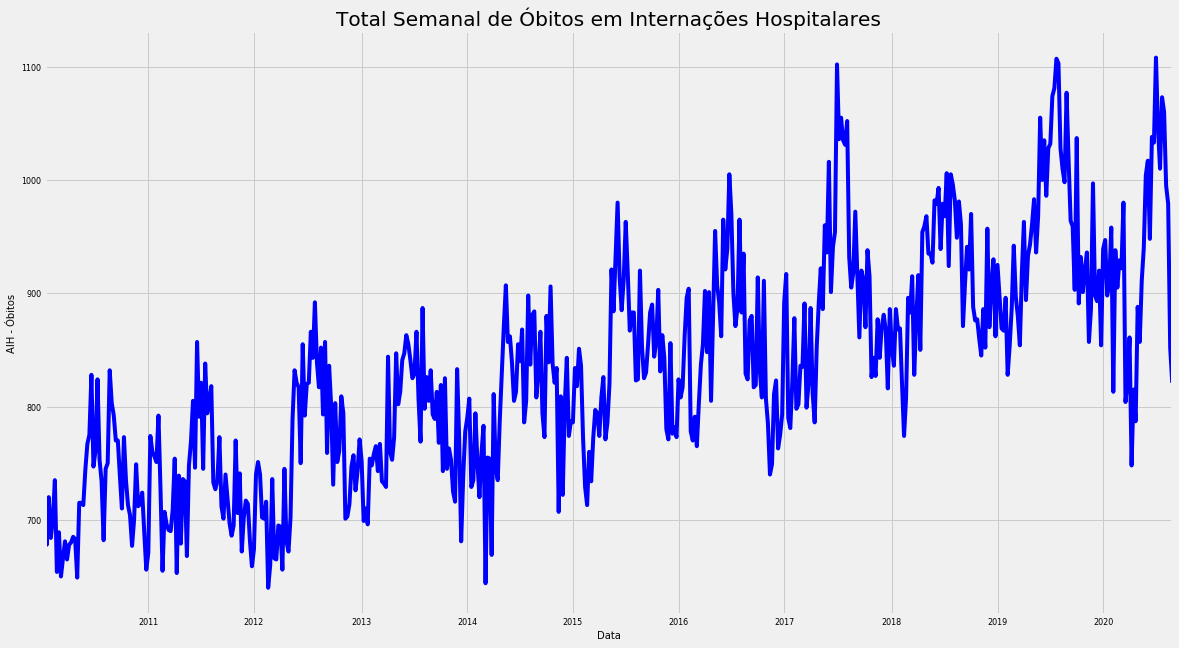

In [14]:
# Total de Óbitos em Internações Hospitalares
ax = target.plot(color = 'b', figsize = (18,10))
plt.xlabel("Data")
plt.ylabel('AIH - Óbitos')
plt.title("Total Semanal de Óbitos em Internações Hospitalares")
plt.show()

In [15]:
dataframe.index

DatetimeIndex(['2010-01-10', '2010-01-17', '2010-01-24', '2010-01-31',
               '2010-02-07', '2010-02-14', '2010-02-21', '2010-02-28',
               '2010-03-07', '2010-03-14',
               ...
               '2020-06-28', '2020-07-05', '2020-07-12', '2020-07-19',
               '2020-07-26', '2020-08-02', '2020-08-09', '2020-08-16',
               '2020-08-23', '2020-08-30'],
              dtype='datetime64[ns]', name='Data', length=556, freq='W-SUN')

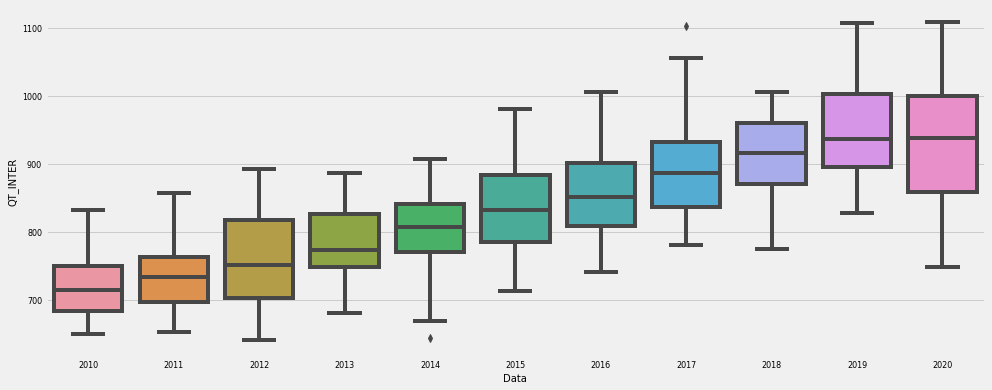

In [16]:
# Define a área de plotagem para os subplots (os boxplots)

fig, ax = plt.subplots(figsize=(15,6))

# Cria um box plot para cada ano usando o Seaborn
# Observe que estamos extraindo o ano (year) do índice da série
sns.boxplot(dataframe.QT_INTER.index.year, dataframe.QT_INTER, ax = ax)

In [12]:
# Vamos extrair os detalhes da coluna Day: ano, mês e dia 
dataframediario = pd.read_csv("./data/AIH.csv")
dataframediario['Data'] = pd.to_datetime(dataframediario.Data, format = '%d/%m/%Y')
for i in (dataframediario,):
    i['ano'] = i.Data.dt.year
    i['mes'] = i.Data.dt.month
    i['dia'] = i.Data.dt.day

<AxesSubplot:xlabel='ano'>

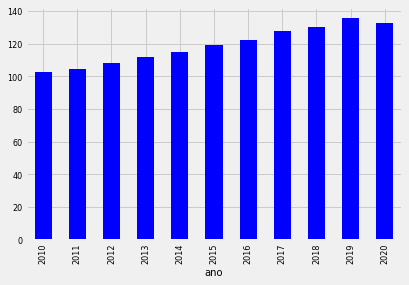

In [13]:
# Vamos criar um gráfico de barras com a demanda de transporte por ano. 
# A interpretação do gráfico é bem clara.
dataframediario.groupby('ano')['QT_INTER'].mean().plot.bar(color = 'blue', figsize = (6,4))

<AxesSubplot:xlabel='mes'>

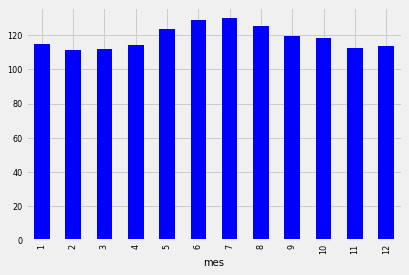

In [14]:
# Vamos criar um gráfico de barras com a demanda de transporte por mês. 
# A demanda atinge seu pico no mês de Agosto e cai nos meses seguintes.
dataframediario.groupby('mes')['QT_INTER'].mean().plot.bar(color = 'blue', figsize = (6,4))

<AxesSubplot:xlabel='dia'>

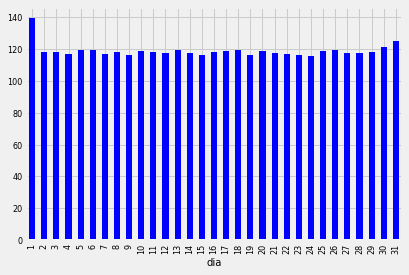

In [15]:
# Vamos criar um gráfico de barras com a demanda de transporte por mês. 
# A demanda atinge seu pico no mês de Agosto e cai nos meses seguintes.
dataframediario.groupby('dia')['QT_INTER'].mean().plot.bar(color = 'blue', figsize = (6,4))

<AxesSubplot:title={'center':'Média de Óbitos em Internações Hospitalares Por Mês a Cada Ano'}, xlabel='ano,mes'>

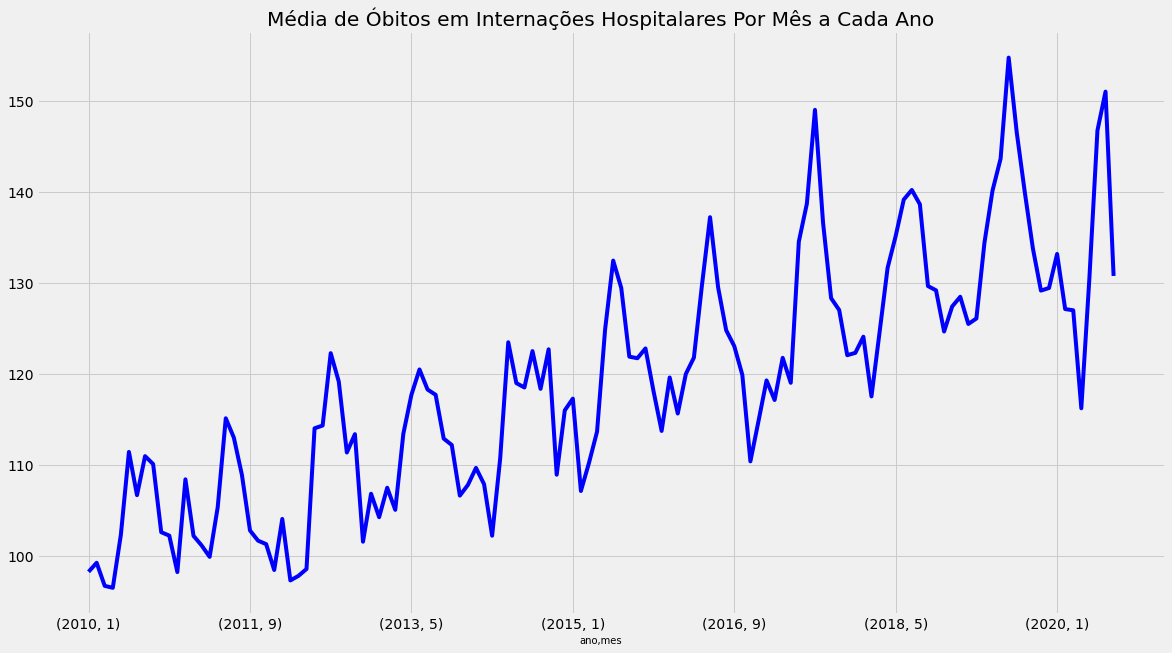

In [16]:
# Vamos calcular a média mensal por ano
# Em média, há um crescimento mensal de demanda a cada ano
media_mensal = dataframediario.groupby(['ano','mes'])['QT_INTER'].mean()
media_mensal.plot(title = "Média de Óbitos em Internações Hospitalares Por Mês a Cada Ano", 
                  fontsize = 14, color = 'blue', figsize = (18,10))

<AxesSubplot:xlabel='dia'>

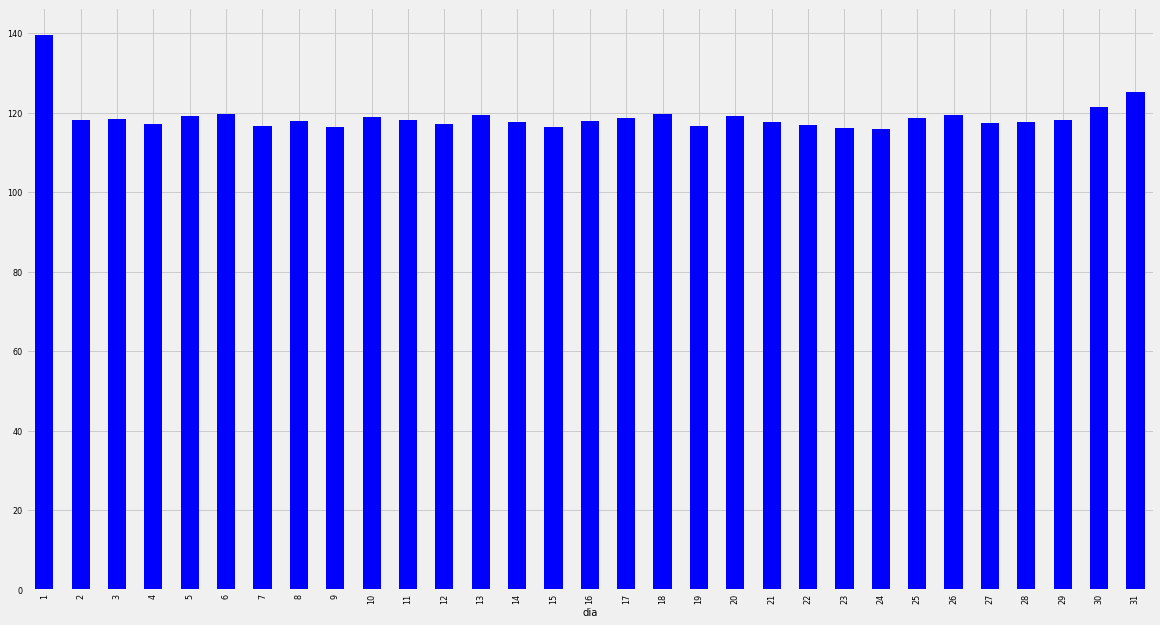

In [17]:
# E qual será a média diária por dia do mês? Vamos checar.
# O dia do mês não parece ser relevante para a demanda.
dataframediario.groupby('dia')['QT_INTER'].mean().plot.bar(color = 'blue', figsize = (18,10))

In [18]:
dataframediario = dataframediario.set_index('Data')

In [19]:
# Dados
dataframediario.head()

,QT_INTER,ano,mes,dia
Data,,,,
2010-01-01,70,2010,1,1
2010-01-02,92,2010,1,2
2010-01-03,104,2010,1,3
2010-01-04,134,2010,1,4
2010-01-05,117,2010,1,5


In [20]:
# Verifica os tipos de dados
dataframediario.dtypes

QT_INTER    int64
ano         int64
mes         int64
dia         int64
dtype: object

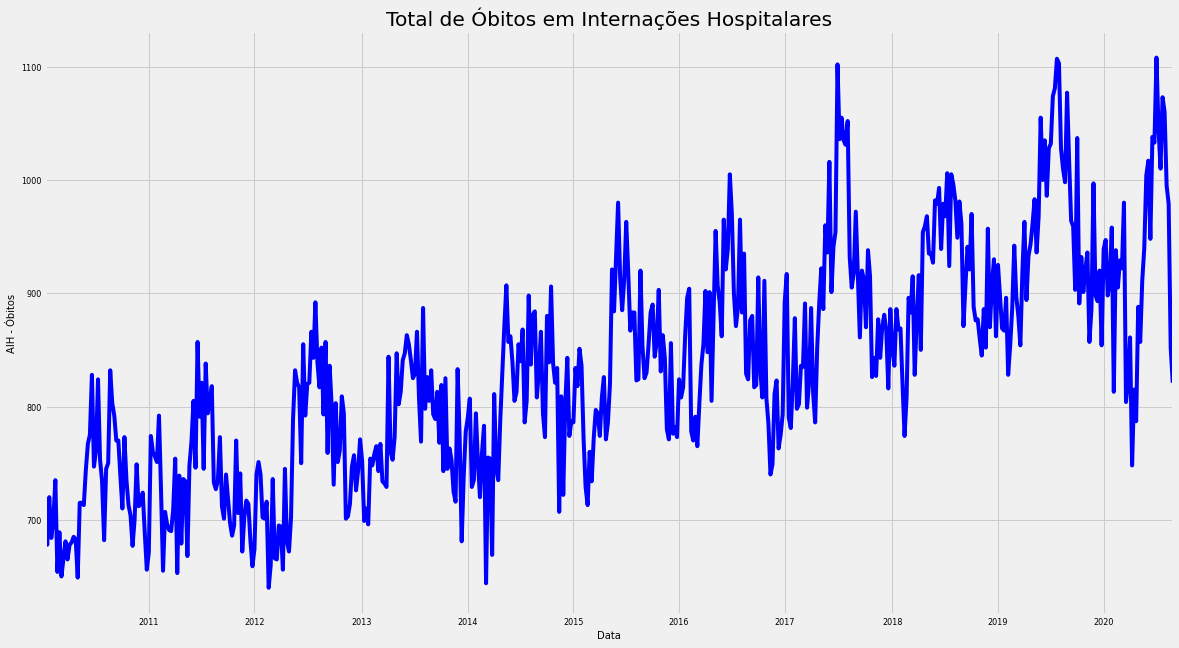

In [21]:
# Total de Óbitos em Internações Hospitalares
ax = target.plot(color = 'b', figsize = (18,10))
plt.xlabel("Data")
plt.ylabel('AIH - Óbitos')
plt.title("Total de Óbitos em Internações Hospitalares")
plt.show()

In [22]:
# Série temporal da média de demanda de transporte por mês
seria_media_mes = dataframe.resample('M').mean()

# Série temporal da média de demanda de transporte por semana
seria_media_semana = dataframe.resample('W').mean() 

# Série temporal da média de demanda de transporte por dia
seria_media_dia = dataframe.resample('D').mean() 

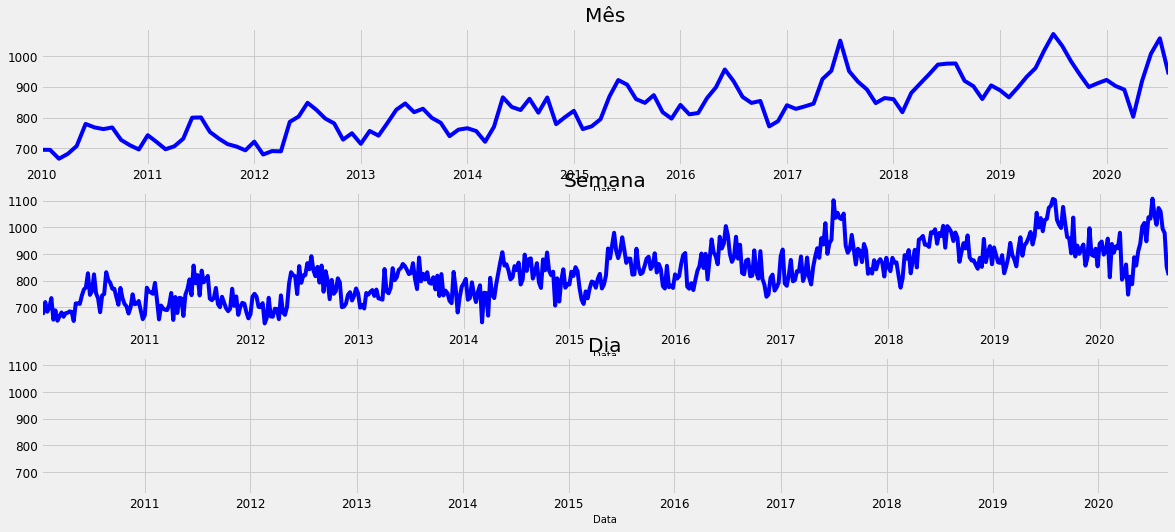

In [23]:
# Plot
fig, axs = plt.subplots(3,1) 
seria_media_mes.QT_INTER.plot(title = 'Mês', fontsize = 12, ax = axs[0], color = 'blue', figsize = (18,8)) 
seria_media_semana.QT_INTER.plot(title = 'Semana', fontsize = 12, ax = axs[1], color = 'blue', figsize = (18,8)) 
seria_media_dia.QT_INTER.plot(title = 'Dia', fontsize = 12, ax = axs[2], color = 'blue', figsize = (18,8)) 
#plt.legend(loc = "best")
plt.show()

## Pré-Processamento

Já coletamos bastante informação sobre nossos dados. Essa compreensão ajuda a entender se nosso modelo preditivo é eficiente. Vamos dividir os dados de treino e validação para treinar e validar a performance do modelo antes de usar os dados de teste.

#### Dados de Treino

In [24]:
# Os dados de treino serão divididos em dados de treino e teste.
# Observe que os registros são separados em ordem cronológica.
dados_treino = dataframe.iloc[0:417]
dados_teste = dataframe.iloc[417:]
print(len(dados_treino), len(dados_teste))

417 139


# Fim